# Исследование продаж игр за 2016 г.
Есть информация о продаже игр до 2016г. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

<div> <b>Цель исследования:</b><br>
    1. Выявить закономерности определяющие успешность игры<br>
    2. Выявить зависимость продаж от платформы<br>
    3. Выявить зависимость продаж от отзывов<br>
    4. Проверить гипотезы относительно средних рейтингов<br><br>
    <b>Ход исследования:</b><br>
    1. После выгрузки таблицы посмотрим на данные, постараемся избавиться от пропусков и дубликатов<br>
    2. Посчитаем общие продажи<br>
    3. Исследуем колличество игр по годам и платформам, определим <b>актуальный период</b><br>
    4. Определим перспективные платформы<br>
    5. Посмотрим на влияние отзывов на продажи<br>
    6. Посмотрим на влияние жанра на продажи<br>
    7. Определим для пользователя каждого региона:<br>
    <ul>
         <li>Самые популярные платформы</li>
         <li>Самые популярные жанры</li>
         <li>Влияет ли рейтинг ESRB на продажи в отдельном регионе</li>
    </ul>
    8. Проверим гипотезы:<br>
    <ul>
         <li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</li>
         <li>Средние пользовательские рейтинги жанров Action и Sports разные</li>
     </ul>
</div>

### Обзор и подготовка исходной таблицы
#### Обзор исходных данных

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('games.csv')
print(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Названия столбцов написаны с заглавной буквы. Есть пропуски.
#### Замена столбцов
Тут же приведем все строчные значения к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()
data['platform'] = data['platform'].str.lower()
data['rating'] = data['rating'].str.lower()

#### Преобразование столбцов
Заменим в колонке оценок пользователей TBD на NaN и поменяем тип данных на числовой.

In [6]:
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)

#### Обработка пропусков
Удалим строки без названия игр. Остальные пропуски пока оставим, они не мешают исследованию.

In [7]:
data = data.dropna(subset=['name'])

#### Суммарные продажи
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [13]:
data.loc[:,'sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#### Обзор подготовленых данных
Посмотрим информацию о новой таблице и проверим на явные дубликаты.

In [10]:
print(data.info())
print(data.duplicated().unique())

<class 'pandas.core.frame.DataFrame'>
Index: 16714 entries, 0 to sales
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sales            16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
[False]


Явных дубликатов нет.

In [11]:
data = data[~((data['platform']=='ds')&(data['year_of_release']==1985))]

Дальнейшие исследования показали, что данные об этой игре ошибка.

### Исследование данных
#### Количество игр
Посмотрим сколько игр выпускалось в разные года и как хорошо они продавались.

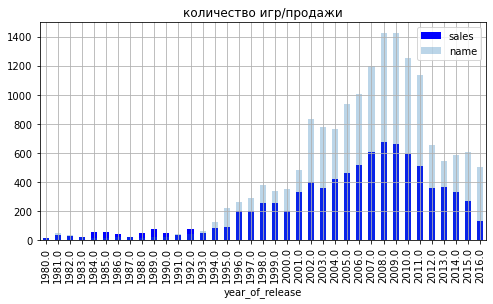

In [19]:
sales = data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
quantity = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

ax1 = sales.plot.bar(color="blue")
quantity.plot.bar(ax=ax1, alpha=0.3, grid=True, figsize=(8,4),title = 'количество игр/продажи')
quality = sales['sales']/quantity['name']


Видно, что количество выпускаемых игр увеличивается до 2008г, после чего резко сокращается и выходит на постоянную величину к 2012г. Возможно это связано с несколькими причинами:
- появление Free to Play игр
- появление мобильных приложений

Заметно, что в 2016г. продаж значительно меньше чем в предыдущие годы, это связано с тем что ещё не все желающие купили новые игры. 

Считаю самыми показательными 2012-2015гг.

Интересно посмотреть на среднее колличество продаж одной игры по годам.

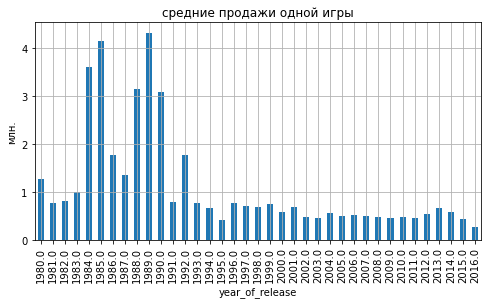

In [24]:
quality.plot.bar(grid=True, title = 'средние продажи одной игры', ylabel = 'млн.', figsize=(8,4));

Интересно, что в среднем, начиная c 90-х годов, игры продаются полумиллионным тиражом, вне зависимости от количества выпущеных игр. В 80-х игры продавались значительно лучше.

#### Продажи по платформам. 
Посмотрим на топ 10 успешных платформ.

,sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.10
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


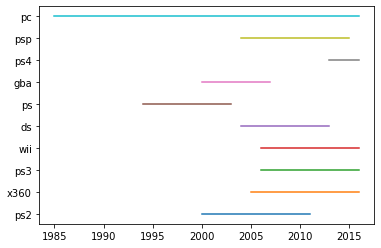

In [22]:
import matplotlib.pyplot as plt
top_platform = (data.pivot_table(index=['platform'], values='sales', aggfunc='sum')
        .sort_values('sales',ascending=False))

df = data.pivot_table(index=['platform','year_of_release'], values='sales', aggfunc='sum').reset_index()

display(top_platform.head(10))
for i in top_platform.index[0:10]:
    plt.plot(df[df['platform'] == i]['year_of_release'], df[df['platform'] == i].pop('platform'))

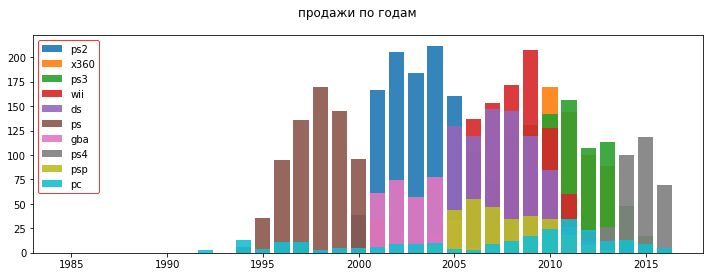

In [28]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.suptitle('продажи по годам')
for i in top_platform.index[0:10]:
    ax.bar(df[df['platform'] == i]['year_of_release'], 
           df[df['platform'] == i]['sales'],
           alpha=0.9,
           label = i)
ax.legend(ncol = 1,edgecolor = 'r');

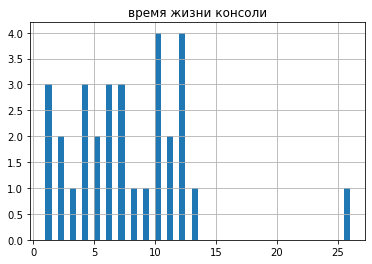

In [33]:
df.reset_index().pivot_table(index=['platform'], values='year_of_release', aggfunc='count').hist(bins=50)
plt.title('время жизни консоли');

Платформы живут не более 13 лет.

### Актуальные данные
#### Средние значения
Как уже говорилось [ранее](#Количество-игр), рассмотрим игры за 2012-2015гг.

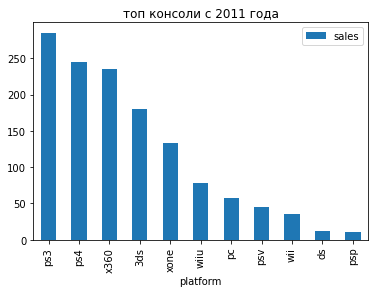

In [36]:
actual_data = data[(data['year_of_release']<2016) & (data['year_of_release']>2011)]
actual_top = (actual_data.pivot_table(index=['platform'], values='sales', aggfunc='sum')
        .sort_values('sales',ascending=False))
actual_top.plot.bar(title='топ консоли с 2011 года');

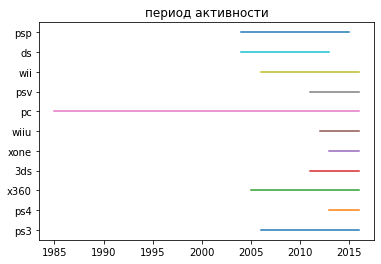

In [41]:
actual_df = actual_data.pivot_table(index=['platform','year_of_release'], values='sales', aggfunc='sum').reset_index()
for i in actual_top.index[:]:
    plt.plot(df[df['platform'] == i]['year_of_release'], 
             df[df['platform'] == i].pop('platform'))
plt.title('период активности');

Не будем учитывать платформы которым уже больше 10 лет.

Остаются <b>ps4, 3ds, xone, wiiu, pc, psv</b>

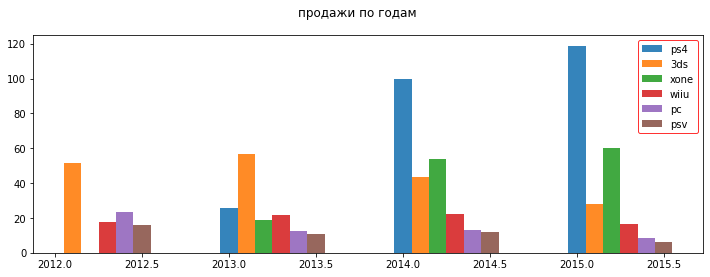

In [43]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
actual_platform = ['ps4', '3ds', 'xone', 'wiiu', 'pc', 'psv']
for i in range(6):
    ax.bar(actual_df[actual_df['platform'] == actual_platform[i]]['year_of_release']+i/10, 
           actual_df[actual_df['platform'] == actual_platform[i]]['sales'],
           alpha=0.9,
           width=1/10,
           label = actual_platform[i])
ax.legend(ncol = 1,edgecolor = 'r')
fig.suptitle('продажи по годам')
final_data = actual_data[actual_data['platform'].isin(actual_platform)]

Продажи на xone и ps4 стремительно растут и являются максимальными.

<b>xone и ps4</b> - лучший выбор.


#### Медианные значения
Посмотрим на распределение продаж по платформам.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54


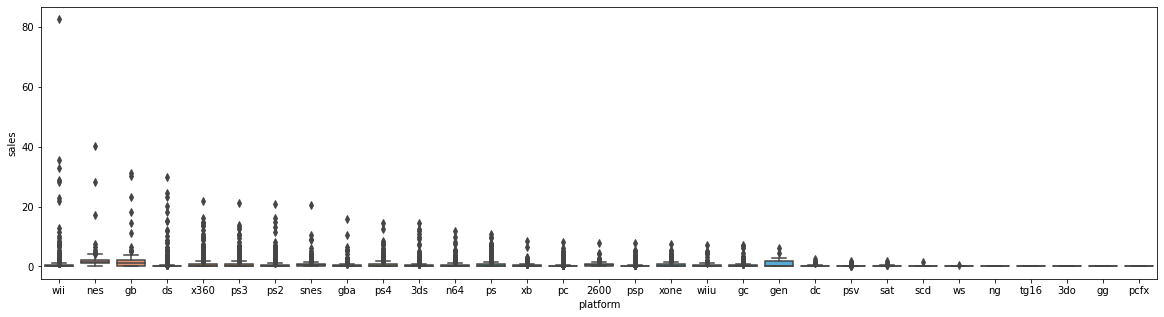

In [44]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x='platform', y='sales', data=data)
display(data[data['sales']==data['sales'].max()])

Очень небольшое количество игр становится успешными. Лучше всего класть игру в коробку с приставкой и считать это за продажу.

<AxesSubplot:xlabel='platform', ylabel='sales'>

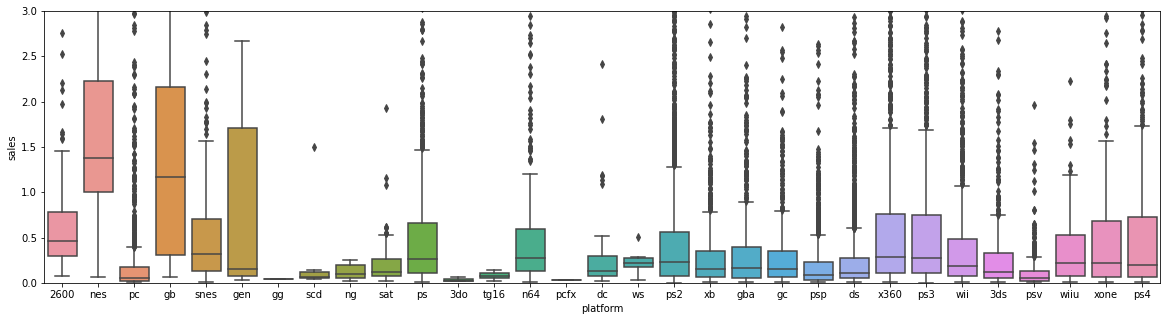

In [46]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.ylim(0,3)
sns.boxplot(x='platform', y='sales', data=data.sort_values('year_of_release'))

Посмотрим на перспективные платформы.

<AxesSubplot:xlabel='platform', ylabel='sales'>

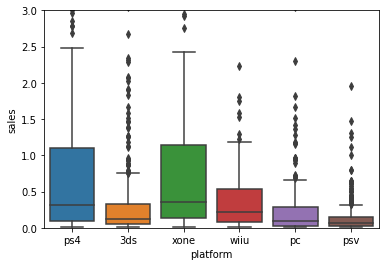

In [47]:
plt.ylim(0,3)
sns.boxplot(x='platform', y='sales', data=final_data)

Медиана тоже говорит, что успешнее игры на ps4 и xone.

#### Влияние отзывов
Посмотрим на влияние отзывов критиков и пользователей на продажи.

ps4


,sales,critic_score,user_score
sales,1.000000,0.431848,0.024231
critic_score,0.431848,1.000000,0.612451
user_score,0.024231,0.612451,1.000000


3ds


,sales,critic_score,user_score
sales,1.000000,0.333148,0.210567
critic_score,0.333148,1.000000,0.723831
user_score,0.210567,0.723831,1.000000


xone


,sales,critic_score,user_score
sales,1.000000,0.459385,-0.039268
critic_score,0.459385,1.000000,0.499502
user_score,-0.039268,0.499502,1.000000


wiiu


,sales,critic_score,user_score
sales,1.000000,0.354691,0.413265
critic_score,0.354691,1.000000,0.760811
user_score,0.413265,0.760811,1.000000


pc


,sales,critic_score,user_score
sales,1.000000,0.263157,-0.159228
critic_score,0.263157,1.000000,0.420645
user_score,-0.159228,0.420645,1.000000


psv


,sales,critic_score,user_score
sales,1.000000,0.116121,0.013595
critic_score,0.116121,1.000000,0.711630
user_score,0.013595,0.711630,1.000000


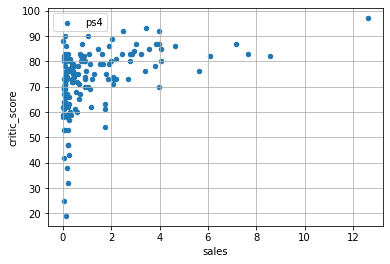

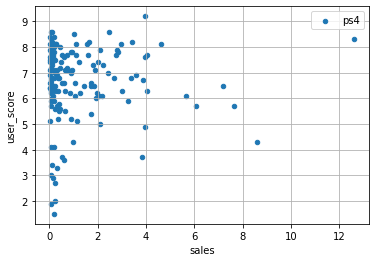

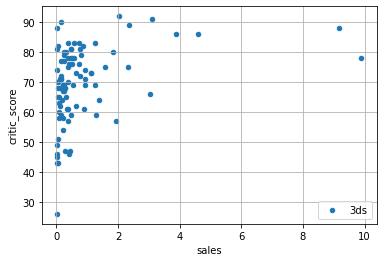

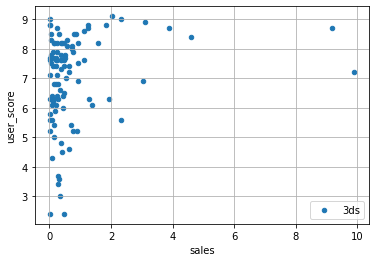

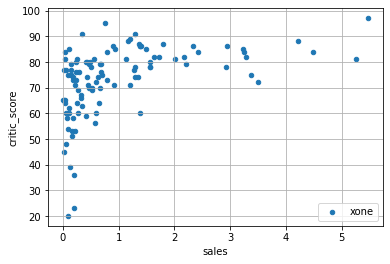

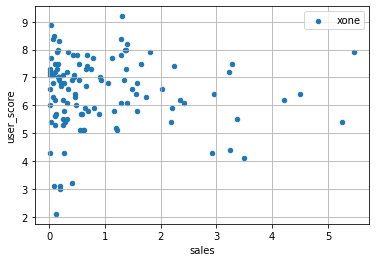

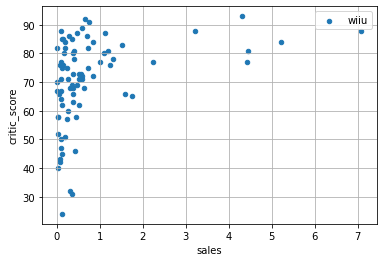

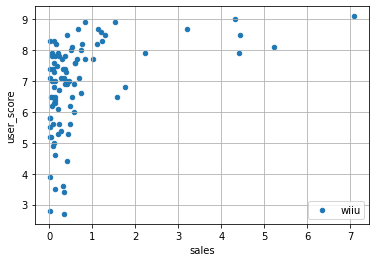

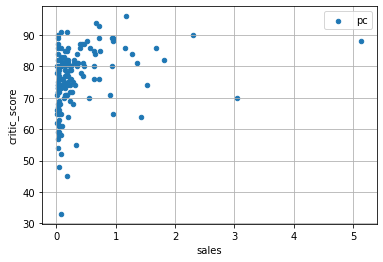

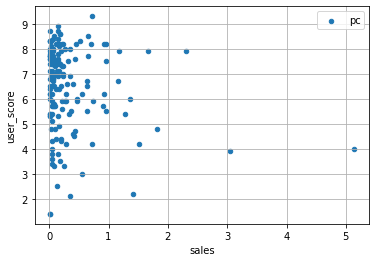

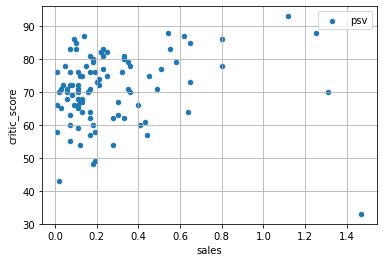

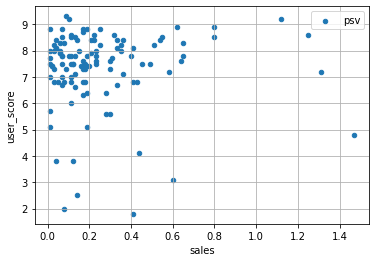

In [48]:
for i in actual_platform:
    final_data[final_data['platform']==i].plot.scatter(x='sales', y='critic_score', grid=True, label=i )
    final_data[final_data['platform']==i].plot.scatter(x='sales', y='user_score', grid=True, label=i )
    print(i)
    display(final_data[final_data['platform']==i][[ 'sales', 'critic_score', 'user_score']].corr())

Отзывы слабо влияют на продажи. Сильнее всего отзывы критиков влияют на продажи xone и ps4(самые перспективные платформы).

#### Влияние жанра
Посмотрим, как жанр влияет на продажи.

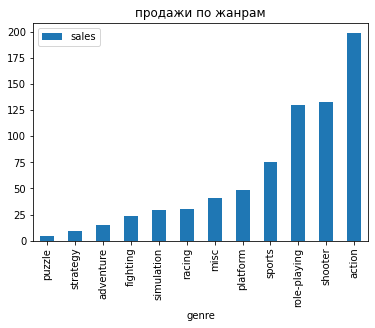

In [50]:
final_data.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values('sales').plot.bar(title = 'продажи по жанрам');

Больше всего было продано игр в жанрах action, shooter и role-play.

Но насколько в среднем был успешен каждый жанр?

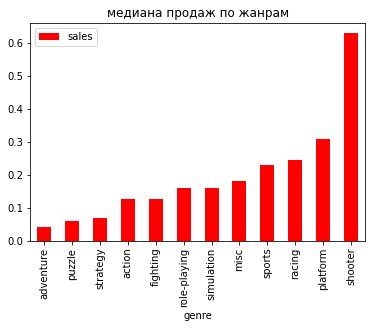

In [51]:
final_data.pivot_table(index='genre', values='sales', aggfunc='median').sort_values('sales').plot.bar( color='red', title = 'медиана продаж по жанрам');

С огромным отрывом лидирует <b> shooter </b>

#### Влияние рейтинга
Проведем те же исследования для рейтинга.

<AxesSubplot:title={'center':'медиана продаж по жанру'}, xlabel='rating'>

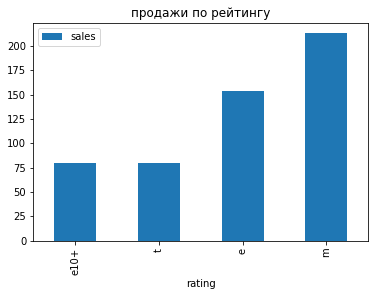

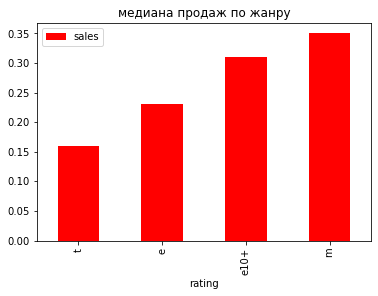

In [52]:
final_data.pivot_table(index='rating', values='sales', aggfunc='sum').sort_values('sales').plot.bar(title = 'продажи по рейтингу')
final_data.pivot_table(index='rating', values='sales', aggfunc='median').sort_values('sales').plot.bar(color='red', title = 'медиана продаж по жанру')

Игры для взрослой аудитории людируют в обоих случаях.

### Портрет пользователя
Как мы убедились ранее актуальнее рассматривать медианное значение, т.к. оснавную часть продаж составляют выбросы.
#### Самые популярные платформы
Посмотрим на топ популярных платформ для разных регионов.

,na_sales,eu_sales,jp_sales
platform,,,
xone,0.49,0.29,0.00
wiiu,0.27,0.19,0.00
ps4,0.24,0.35,0.18
3ds,0.00,0.00,0.55
pc,0.00,0.17,0.00
psv,0.00,0.00,0.27


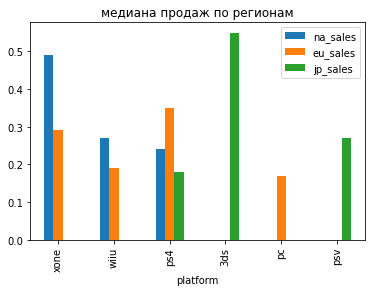

In [55]:
top_platform = (np.round(final_data.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='median')/
           (final_data.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='median')
            [['na_sales','eu_sales','jp_sales']].sum()), 2)).sort_values(
    'na_sales', 
    ascending=False
).reindex(
    columns=['na_sales','eu_sales','jp_sales']
)
display(top_platform)
top_platform.plot.bar(title = 'процент продаж по регионам');

В европе и америке популярность платформ очень похожа. В америке чуть больше любят xone, в европе - ps4. Также в европе можно расчитывать на продажи игр для ПК.

Кардинально отличаются популярные платформы в Японии. Там предпочитают свои карманные приставки.

#### Самые популярные жанры
Посмотрим на топ популярных жанров для разных регионов.

,na_sales,eu_sales,jp_sales
genre,,,
shooter,0.37,0.38,0.00
platform,0.22,0.16,0.07
sports,0.15,0.08,0.00
racing,0.10,0.17,0.00
fighting,0.08,0.05,0.14
action,0.05,0.04,0.07
role-playing,0.03,0.01,0.43
adventure,0.00,0.00,0.07
misc,0.00,0.03,0.21


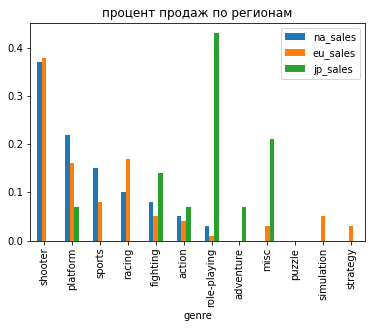

In [57]:
top_genre = (np.round(final_data.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='median')/
           (final_data.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='median'
                                  )[['na_sales','eu_sales','jp_sales']].sum()), 2)).sort_values(
                                        'na_sales', 
                                        ascending=False
                                    ).reindex(
                                        columns=['na_sales','eu_sales','jp_sales']
                                    )
display(top_genre)
top_genre.plot.bar(title = 'процент продаж по регионам');

В европе и америке лидируют shooter и platform. Также в америке успешны sports, а в европе racing.

В Японии стабильно покупают role-play, misc и fighting.

#### Влияние рейтинга
Посмотрим на влияние возрастного рейтинга на продажи для разных регионов.

,na_sales,eu_sales,jp_sales
rating,,,
m,0.37,0.39,0.0
e10+,0.32,0.29,0.0
e,0.22,0.21,0.0
t,0.10,0.11,1.0


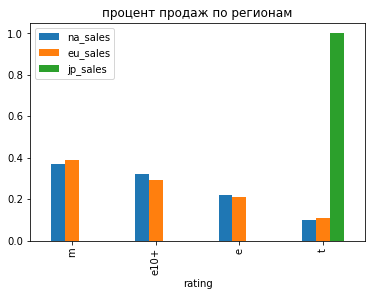

In [59]:
top_rating = (np.round(final_data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='median')/
           (final_data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='median')
            [['na_sales','eu_sales','jp_sales']].sum()), 2)).sort_values(
    'na_sales', 
    ascending=False
).reindex(
    columns=['na_sales','eu_sales','jp_sales']
)
display(top_rating)
top_rating.plot.bar(title = 'процент продаж по регионам');

Единственными стабильными играми в Японии можно назвать игры для тинейджеров.

На западе больше всего покупают игр с высоким возрастным ограничением. А игры для подростков не популярны.

### Проверка гипотез
#### Средние пользовательские рейтинги платформ Xbox One и PC
$ H_0 $ - Средние пользовательские рейтинги платформ Xbox One и PC за все время одинаковы.

In [60]:
from scipy import stats as st

def test_user_score(col, val_1, val_2, data=data):
    result = st.ttest_ind(
                (data[data[col]==val_1]['user_score']).dropna(), 
                (data[data[col]==val_2]['user_score']).dropna())
    print('p-значение:', result.pvalue)

In [61]:
test_user_score('platform', 'xone', 'pc')

p-значение: 1.3896435533548819e-05


Отвергаем нулевую гипотезу.

Средние пользовательские рейтинги платформ xone и pc за все время различны.

Проверим ту же гипотезу, но за последнее время.

In [62]:
test_user_score('platform', 'xone', 'pc', data=final_data)

p-значение: 0.9463196313131613


В актуальном периоде средние пользовательские рейтинги платформ xone и pc совпадают.

#### Средние пользовательские рейтинги жанров Action и Sports
$ H_0 $ - Средние пользовательские рейтинги жанров Action и Sports за все время одинаковы.

In [29]:
test_user_score('genre', 'action', 'sports')

p-значение: 0.10406951359049141


Нельзя отвергнуть нулевую гипотезу 

Средние пользовательские рейтинги жанров Action и Sports за все время вероятно одинаковы.

Проверим гипотезу за актуальный период

In [30]:
test_user_score('genre', 'action', 'sports', data=final_data)

p-значение: 1.1083805001802558e-14


Отвергаем нулевую гипотезу.

Средние пользовательские рейтинги жанров Action и Sports в последнее время различны.

### Вывод
Провел анализ имеющейся информации по играм, для этого изучил количество игр по годам и их продажи. Это позволило определить период <b>2012-2015гг.</b>, данные которого можно использовать для анализа современных тенденций. 

Выяснил, что платформы не живут дольше 13 лет, на основании этого выделил 6 актуальных платформ(<b>ps4, 3ds, xone, wiiu, pc, psv</b>), из которых 2 (<b>Xbox one</b> и <b>ps4</b>) активно наращивают продажи, и игры на эти приставки продаются стабильнее чем на другие.

Оказалось, что отзывы слабо влияют на успешность игры. Небольшая корреляция есть для отзывов критиков и приставок <b>Xbox one</b> и <b>ps4</b>, что еще раз подчеркивает их перспективность.

Больше всего продано игр в жанрах <b>action</b>, <b>shooter</b> и <b>role-play</b>, однако стабильнее всего из них с огромным отрывом продается <b>shooter</b>.

В мире популярны игры для взрослой аудитории.

На основе данных за последние года выяснил, что в разных регионах популярны разные приставки и жанры. На западе предпочитают <b>Xbox one</b> и <b>ps4</b>, а также <b>wiiu</b>, играют в основном в <b>shooter</b>. В Японии выбирают японские приставки и <b>role-play</b>.

Проверил гипотезы для разных периодов. 
- Средние пользовательские рейтинги платформ xone и pc за все время различны.
- В актуальном периоде средние пользовательские рейтинги платформ xone и pc совпадают.
- Средние пользовательские рейтинги жанров Action и Sports за все время вероятно одинаковы.
- Средние пользовательские рейтинги жанров Action и Sports в последнее время различны.

В последние годы активно продвигаются приставки <b>Xbox one</b> и <b>ps4</b>, также на продажу игры на этих приставких возможно повлиять оценками критиков. Лучше всего сконцентрироваться на <b>action</b>. Также удачная идея класть игру в коробку с приставкой, как это было с wii sports.